## Plotting assignment

Use whichever plotting library you like, or a mixture of them. The primary ones we covered in class include matplotlib, toyplot, and bokeh. Matplotlib can accomplish all of the tasks, whereas toyplot can do almost all of them but you will need to use matplolib for 3-d plots. 

In [1]:
import toyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh.io 
from bokeh.plotting import figure
%matplotlib inline

In [2]:
# Set to output the plot in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

### Use the following formating for all plots: 
+ width=300
+ height=300

In [3]:
# you could save it as kwargs, for example, this would work with toyplot figs
kwargs = {"width": 300, "height": 300}

# Scatterplots

__Problem 1:__  
+ N = 200 samples √
+ x = N values drawn from a normal distribution with mean=10, std=2;√  
+ y = N values drawn from an exponential distribution with rate parameter 3;√
+ marker size is a equal to the value of y. √

In [4]:
N = 200
x1 = np.random.normal(10,2, size=N)
y1 = np.random.exponential(1/3, size=N) 

In [10]:
s_plot = bokeh.plotting.figure(**kwargs)
s_plot.circle(x1, y1, size=y1)
bokeh.io.show(s_plot)

__Problem 2:__  
+ N = 200 samples √
+ x = N values drawn from a uniform distribution between 0 and 1000; √ 
+ y = N values drawn from a uniform distribution between 0 and 1000; √ 
+ marker color = is a color from a continuous colormap mapped to the value of x; √  
+ marker size = N values drawn from a uniform distribution between 1 and 10; √   

In [6]:
N = 200
x2 = np.random.uniform(0,1000, size=N)
y2 = np.random.uniform(0,1000, size=N)
size = np.random.uniform(0, 10, size=N)
canvas = toyplot.Canvas(**kwargs)
axis = canvas.cartesian()
colormap = toyplot.color.brewer.map("GreenBluePurple")
axis.scatterplot(x2, y2 , size=size, color= (x2, colormap), marker="o");

0 500 1000 0 500 1000

__Problem 3:__  
+ N = 500 samples √
+ x = N values drawn from a normal distribution with mean=0 and std=10; √ 
+ y = x + N values drawn from a normal dist with mean=5, std=10. √
+ marker = square √
+ marker opacity = 0.5 √
+ Only show the x-axis (bottom); hide all other axes.√
+ Show seven equally spaced tick marks on the x-axis with integer tick-labels. √ 
+ Label the x-axis as "Leaf size (cm)"√

In [7]:
N = 500
x3 = np.random.normal(0,10, size=N)
y3 = x3 + np.random.normal(5,10, size=N)

canvas = toyplot.Canvas(**kwargs)
axis3 = canvas.cartesian(xlabel = "Leaf size (cm)", yshow=False)
colormap = toyplot.color.brewer.map("Reds")
axis3.scatterplot(x3, y3 , size=10, color=colormap, marker="s", opacity = 0.5);
axis3.x.ticks.locator = toyplot.locator.Integer(step=10)
axis3.x.ticks.show = True

-32 -22 -12 -2 8 18 28 Leaf size (cm)

# Barplots / histograms

__Problem 4:__  
+ N = 1000 samples √
+ x = N values drawn from a normal distribution with mean=0 and std=10;  √ 
+ draw a histogram of x binned into 15 bins.√
+ color the bins using a colormap to map bin colors to their height.√
+ color the line/stroke around each bin black.  √

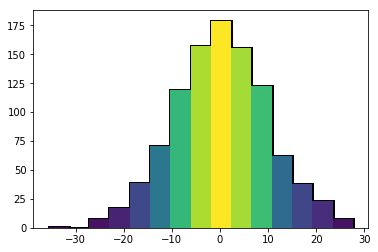

In [36]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
np.random.seed(1234)

N = 1000
x4 = np.random.normal(0,10, size=N)
axs = plt.hist(x4, bins=15, edgecolor='black', linewidth=3, rwidth=10)
n, bins, patches = plt.hist(x4, bins=15)
#color code by height
fracs = n / n.max()

#normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

#loop through the objects and set the color of each accordingly
for fr, pa in zip(fracs, patches):
    color = plt.cm.viridis(norm(fr))
    pa.set_facecolor(color)



__Problem 5:__
+ Create a figure with subplots side by side so that they share the same y-axis. √ 
+ N = 500 samples √
+ x = N values drawn from an exponential distribution with rate parameter 1; √
+ plot1: draw a histogram of x binned into 15 bins. √
+ in the histogram draw bars along the y-axis (horizontal bars as opposed to vertical)√
+ in the histogram use a colormap to map bin colors to their height.√
+ plot2: draw a scatterplot to the right of plot 1 √
+ in the scatterplot do not show the y-axis.√
+ in the scatterplot plot range(N) on the x-axis, and x on y-axis.√
+ in the scatterplot set opacity of markers to 0.5. √


In [33]:
np.random.seed(1234)

N = 500
canvas = toyplot.Canvas(width=800, height=400)
colormap = toyplot.color.brewer.map("Reds")

# PLOT 1
x6 = np.random.exponential(1/1, size=N)
canvas.cartesian(grid=(1,2,0)).bars(np.histogram(x6, 15), along ="y",color=colormap)

# PLOT 2
axis6 = canvas.cartesian(grid=(1,2,1), yshow=False )
axis6.scatterplot(
    range(N), 
    x6 , 
    size=10, 
    color= (x6, colormap), 
    marker="o", 
    opacity = 0.5,
);

0 50 100 150 200 0 2 5 8 0 100 200 300 400 500